<a href="https://colab.research.google.com/github/grievous-mischievous7/NNDL_LAB/blob/main/Spring_22_NNDL_Lab_3_190020028.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 3 : Associative Networks 

Name : **Neville Thomas Sebastian**

Roll Number : **190020028**

Referrence Material : **Chapter 4, page no. 90-110, Artificial Neural Network by B. Yegnanarayana**


#**Problem 1** : Demonstrate the working principle of two layer auto-associative network. Observation to be demonstrated are:
1. Limitation of no. of patterns to input dimensionality.
2. Effect of orthonormal, orthogonal, linearly independent and linearly dependent input vectors.
3. Use all 3 learning rules (i.e. by computation, Widrow and Hebbian), to find the optimal weight and mention their pros. and cons.

Hints:

1. Generate data such that each input output data points have different functional
relation.
2.  First do it using computation method for each set of data (i.e orthogonal, orthonormal, linearly independent and linearly dependent (not all only few) case ), then take the performance as reference, to implement using Widrow and Hebbian learning.

##Write down the Objectives, Hypothesis and Experimental description for the above problem



## Programming : 
  Please write a program to demonstrate the same

In [43]:
import numpy as np
import scipy.linalg as sc
import matplotlib.pyplot as plt

## Write your code here to Generate the Data
## Important Parameters to generate data are : Number of Datapoints, Dimension of Data
#N_data=3
#dim=3
A_LI=np.array([[0,1,2],[1,2,0],[2,1,0]]).T
B_LI=[3,1,2]*(A_LI)

A_orthonormal=sc.orth(A_LI)
B_orthonormal=[3,1,2]*(A_orthonormal)

A_LD=np.array([[0,1,2],[1,2,0],[1,3,2]]).T
B_LD=[3,1,2]*(A_LD)

In [2]:
def weights_by_computation(A,B):

  ## Here A is input and B is output
  
  weights = B@np.linalg.pinv(A)## Write the weight equation here
  error = np.square(np.linalg.norm(B-(weights@A)))*1/A.shape[1]## Mean Squared Error

  return weights,error


In [50]:
def weights_by_widrow(A,B,num_epochs,learning_rate):

  ## Here A is input and B is output
  weights = np.array([[0.0,0.0,0.0],[0.0,0.0,0.0],[0.0,0.0,0.0]])## Initialise weights here
  error=[]
  for epoch in range(num_epochs):

    ## Write the widrow learning training loop here
    output=weights@A
    D_w=lr*((B-output)@A.T)
    weights+=D_w
    error.append((1/A.shape[1])*np.sum(np.square(B-output)))

  return weights,error


In [47]:
def weights_by_hebbian(A,B,num_epochs,lr):

  ## Here A is input and B is output
  weights = np.array([[0.0,0.0,0.0],[0.0,0.0,0.0],[0.0,0.0,0.0]])## Initialise weights here
  error=[]
  for epoch in range(num_epochs):

    for i in range(A.shape[1]):
      input=np.matrix(A[:,i]).T
      target=np.matrix(B[:,i]).T
      D_w=lr*input@target.T
      weights+=D_w
      error=np.square(np.linalg.norm(B-(weights@A)))*1/A.shape[1]
    
    if np.round(error,8)==0:
      return weights,error;
    
  return weights,error

In [7]:
w,err=weights_by_computation(A_LI,B_LI)
print('weights by computation for linearly independant A \n',(w))
print('error by computation = '+str(np.round(err,8)))
print('\n')

w,err=weights_by_computation(A_orthonormal,B_orthonormal)
print('weights by computation for orthonormal A \n',(w))
print('error by computation = '+str(np.round(err,8)))
print('\n')

w,err=weights_by_computation(A_LD,B_LD)
print('weights by computation for linearly dependant A \n',(w))
print('error by computation = '+str(np.round(err,8)))

weights by computation for linearly independant A 
 [[ 2.33333333e+00 -6.66666667e-01  3.33333333e-01]
 [ 6.66666667e-01  6.66666667e-01  1.16666667e+00]
 [-8.44199333e-17 -5.59772179e-18  3.00000000e+00]]
error by computation = 0.0


weights by computation for orthonormal A 
 [[2.14307894 0.50286107 0.57231576]
 [0.50286107 2.55495208 0.10835159]
 [0.57231576 0.10835159 1.30196898]]
error by computation = 0.0


weights by computation for linearly dependant A 
 [[ 2.85714286e-01  5.23809524e-01 -9.52380952e-02]
 [ 2.38095238e-01  1.04761905e+00  1.14285714e+00]
 [-6.66666667e-01 -3.33066907e-16  2.66666667e+00]]
error by computation = 0.66666667


weights by widrow for linearly independant A 
 [[ 2.33333333e+00 -6.66666667e-01  3.33333333e-01]
 [ 6.66666667e-01  6.66666667e-01  1.16666667e+00]
 [-4.73696774e-15  5.92120563e-15  3.00000000e+00]]
error by widrow = 0.0




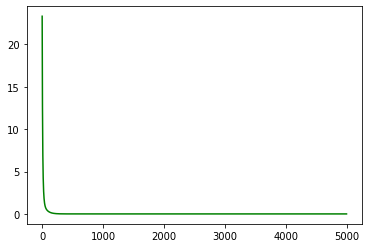


weights by widrow for linearly independant A 
 [[2.14307894 0.50286107 0.57231576]
 [0.50286107 2.55495208 0.10835159]
 [0.57231576 0.10835159 1.30196898]]
error by widrow = 0.0




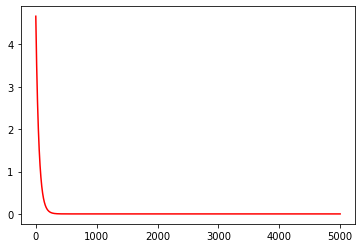


weights by widrow for linearly independant A 
 [[ 2.85714286e-01  5.23809524e-01 -9.52380952e-02]
 [ 2.38095238e-01  1.04761905e+00  1.14285714e+00]
 [-6.66666667e-01  2.46120751e-15  2.66666667e+00]]
error by widrow = 0.66666667




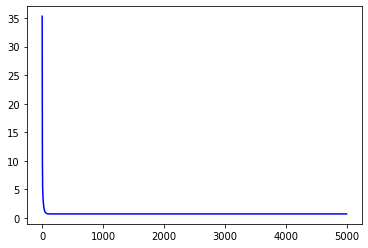

In [69]:
num_epochs=5000
lr=0.01
w,err=weights_by_widrow(A_LI,B_LI,num_epochs,lr)
print('weights by widrow for linearly independant A \n',(w))
print('error by widrow = '+str(np.round(err[-1],8)))
print('\n')
err=np.array(err)
plt.plot(list(range(len(err))),err,color='g')
plt.show()
print('================================================\n')

w,err=weights_by_widrow(A_orthonormal,B_orthonormal,num_epochs,lr)
print('weights by widrow for linearly independant A \n',(w))
print('error by widrow = '+str(np.round(err[-1],8)))
print('\n')
err=np.array(err)
plt.plot(list(range(len(err))),err,color='r')
plt.show()
print('===============================================\n')

w,err=weights_by_widrow(A_LD,B_LD,num_epochs,lr)
print('weights by widrow for linearly independant A \n',(w))
print('error by widrow = '+str(np.round(err[-1],8)))
print('\n')
err=np.array(err)
plt.plot(list(range(len(err))),err,color='b')
plt.show()
print('===============================================\n')

In [48]:
num_epochs=5
lr=1

w,err= weights_by_hebbian(A_LI,B_LI,num_epochs,lr)
print('weights by hebbian for linearly independant A \n',(w))
print('error by hebbian = '+str(np.round(err,8)))
print('\n')

w,err= weights_by_hebbian(A_orthonormal,B_orthonormal,num_epochs,lr)
print('weights by hebbian for orthonormal A \n',(w))
print('error by hebbian = '+str(np.round(err,8)))
print('\n')

w,err= weights_by_hebbian(A_LD,B_LD,num_epochs,lr)
print('weights by hebbian for linearly dependant A \n',(w))
print('error by hebbian = '+str(np.round(err,8)))

weights by hebbian for linearly independant A 
 [[45. 30.  0.]
 [30. 45. 30.]
 [ 0. 30. 60.]]
error by hebbian = 28448.33333333


weights by hebbian for orthonormal A 
 [[2.14307894 0.50286107 0.57231576]
 [0.50286107 2.55495208 0.10835159]
 [0.57231576 0.10835159 1.30196898]]
error by hebbian = 0.0


weights by hebbian for linearly dependant A 
 [[ 15.  40.  20.]
 [ 40. 125.  90.]
 [ 20.  90. 100.]]
error by hebbian = 307695.33333333


## Inferences and Conclusion : State all the key observations and conclusion

# **Problem 2** : Demonstrate the working principle of two layer associative network performing heteroassociation task (i.e each input output pair is related with different functional relations).

Observation to be demonstrated are:
1. Limitation of no. of patterns to input dimensionality.
2. Overcome the limitation by modifying the task to a pattern classification task.
3. Use computation and Widrow’s learning law to demonstrate the same.

Hints:

1. Generate data such that each input output data points have different functional
relation.
2. First do it using computation method , then take the performance as reference, to
implement using Widrow learning.
3. Modify the data and network element such that the network will overcome the
limitation of limitation of no. of data points with the input dimensionality, and
perform pattern classification task.

##Write down the Objectives, Hypothesis and Experimental description for the above problem



## Programming : 
  Please write a program to demonstrate the same

In [ ]:
## Write your code here to Generate the Data
## Important Parameters to generate data are : Number of Datapoints, Dimension of Data

In [ ]:
## You can use the same function defined above for computation method and widrow's learning law

## Inferences and Conclusion : State all the key observations and conclusion